In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages')
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import GCRCatalogs

In [2]:
print('\n'.join(sorted(GCRCatalogs.get_available_catalogs())))

buzzard
buzzard_high-res
buzzard_test
dc1
protoDC2


In [3]:
gc = GCRCatalogs.load_catalog('protoDC2')

In [4]:
gc.get_catalog_info()

{'creators': ['Eve Kovacs',
  'Danila Korytov',
  'Katrin Heitmann',
  'Andrew Benson'],
 'description': 'ProtoDC2 is a down-scaled version of the catalog to be generated for LSST-DESC DC2.\nFor a description of the catalog and the methods, please see https://goo.gl/fXDQwP\n',
 'filename': '/global/projecta/projectdirs/lsst/groups/CS/descqa/catalog/ANL_AlphaQ_v2.1.2.hdf5',
 'lightcone': True,
 'subclass_name': 'alphaq.AlphaQGalaxyCatalog',
 'version': '2.1.2'}

In [5]:
print(sorted(gc.list_all_quantities()))

['Mag_true_Y_lsst_z0', 'Mag_true_g_lsst_z0', 'Mag_true_g_sdss_z0', 'Mag_true_i_lsst_z0', 'Mag_true_i_sdss_z0', 'Mag_true_r_lsst_z0', 'Mag_true_r_sdss_z0', 'Mag_true_u_lsst_z0', 'Mag_true_u_sdss_z0', 'Mag_true_z_lsst_z0', 'Mag_true_z_sdss_z0', 'convergence', 'dec', 'dec_true', 'ellipticity_1_bulge_true', 'ellipticity_1_disk_true', 'ellipticity_1_true', 'ellipticity_2_bulge_true', 'ellipticity_2_disk_true', 'ellipticity_2_true', 'ellipticity_bulge_true', 'ellipticity_disk_true', 'ellipticity_true', 'galaxy_id', 'halo_id', 'halo_mass', 'is_central', 'mag_Y_lsst', 'mag_g_lsst', 'mag_g_sdss', 'mag_i_lsst', 'mag_i_sdss', 'mag_r_lsst', 'mag_r_sdss', 'mag_u_lsst', 'mag_u_sdss', 'mag_z_lsst', 'mag_z_sdss', 'magnification', 'position_angle_true', 'position_x', 'position_y', 'position_z', 'ra', 'ra_true', 'redshift', 'redshift_true', 'sersic_bulge', 'sersic_disk', 'shear_1', 'shear_2', 'size_bulge_true', 'size_disk_true', 'size_minor_bulge_true', 'size_minor_disk_true', 'size_true', 'stellar_mass

In [23]:
data = Table(gc.get_quantities(['ra', 'dec', 'redshift_true', 'mag_g_sdss', 'mag_r_sdss', 'mag_i_sdss', 'mag_z_sdss']))
print(len(data))

10022496


In [24]:
print(data['ra'].min())
print(data['ra'].max())
print(data['dec'].min())
print(data['dec'].max())

-2.49999
2.49999
-2.5
2.5


In [30]:
# area in sq deg
area = 25.

mag_list = ['mag_g_sdss', 'mag_r_sdss', 'mag_i_sdss', 'mag_z_sdss']

In [26]:
# Check for SDSS-MGS equivalents

print('mag_r_sdss < 17.7')
mask = data['mag_r_sdss']<17.7
print(np.sum(mask), np.sum(mask)/area)
print()

print('redshift_true < 0.104')
mask = data['redshift_true']<0.104
print(np.sum(mask), np.sum(mask)/area)
print()

# 0.104 is the median redshift of the SDSS main galaxy sample
print('mag_r_sdss < 17.7 AND redshift_true < 0.104')
mask = (data['mag_r_sdss']<17.7) & (data['redshift_true']<0.104)
print(np.sum(mask), np.sum(mask)/area)
print()

print('mag_r_sdss < 17.7 AND redshift_true > 0.104')
mask = (data['mag_r_sdss']<17.7) & (data['redshift_true']>0.104)
print(np.sum(mask), np.sum(mask)/area)
print()

mag_r_sdss < 17.7
2868 114.72

redshift_true < 0.104
16092 643.68

mag_r_sdss < 17.7 AND redshift_true < 0.104
1240 49.6

mag_r_sdss < 17.7 AND redshift_true > 0.104
1628 65.12



In [65]:
# Check for DEEP2 equivalents
print('mag_r_sdss < 24.1 AND redshift_true < 1.')
mask = (data['mag_r_sdss']<24.1) & (data['redshift_true']<1.)
print(np.sum(mask), np.sum(mask)/area)
print()

print('mag_r_sdss < 24.1 AND 0.85 < redshift_true < 0.95')
mask = (data['mag_r_sdss']<24.1) & (data['redshift_true']>0.85) & (data['redshift_true']<0.95)
print(np.sum(mask), np.sum(mask)/area)
print()

mag_r_sdss < 24.1 AND redshift_true < 1.
1831812 73272.48

mag_r_sdss < 24.1 AND 0.85 < redshift_true < 0.95
164632 6585.28



In [60]:
# Load DEEP2 catalog
deep2 = Table.read('/global/homes/r/rongpu/mydesi/useful/zcat.deep2.dr4.uniq.fits')
print(' '.join(deep2.colnames))
print(len(deep2))
mask = deep2['ZQUALITY']>=3
deep2 = deep2[mask]
print(len(deep2))
print()

area_deep2 = 2.8
print('All DEEP2')
print(len(deep2), len(deep2)/area_deep2)
print()

print('0.85 < redshift < 0.95')
mask = (deep2['ZBEST']>0.85) & (deep2['ZBEST']<0.95)
print(np.sum(mask), np.sum(mask)/area_deep2)
print()

OBJNO RA DEC MAGB MAGR MAGI MAGBERR MAGRERR MAGIERR RG E2 PA PGAL SFD_EBV M_B UB OBJNAME MASK SLIT DATE MJD SLITRA SLITDEC SLITPA SLITLEN Z ZBEST ZERR ZQUALITY CLASS SUBCLASS RCHI2 DOF VDISP VDISPERR COMMENT
50319
35781

All DEEP2
35781 12778.928571428572

0.85 < redshift < 0.95
5013 1790.35714286



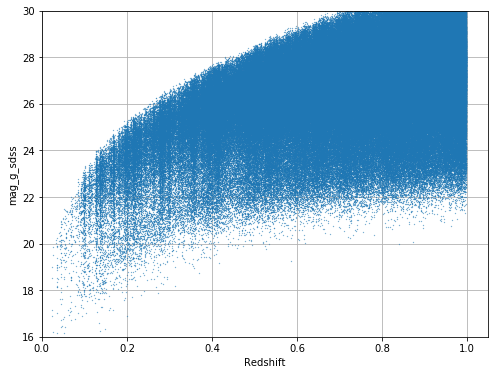

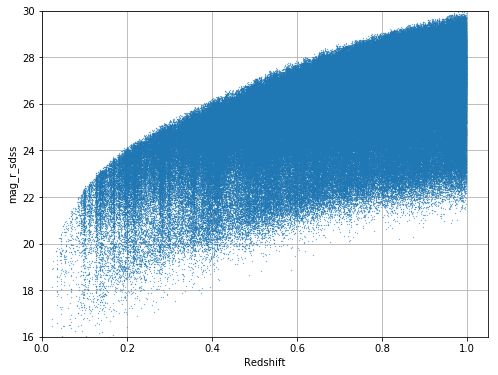

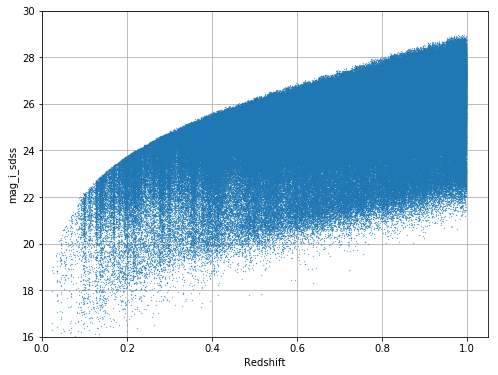

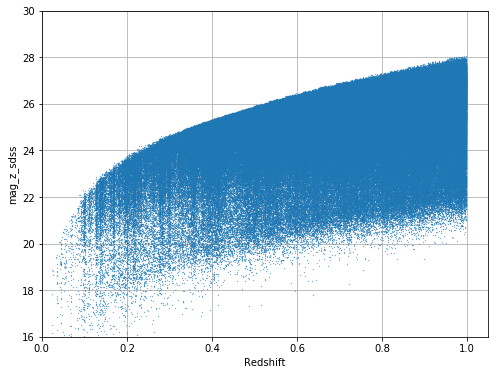

In [35]:
idx = np.random.choice(len(data), size=int(len(data)//20), replace=False)

for mag_col in mag_list:
    plt.figure(figsize=(8, 6))
    plt.plot(data['redshift_true'][idx], data[mag_col][idx], '.', markersize=0.5, alpha=1)
    plt.xlim([0., 1.05])
    plt.ylim([16.0, 30])
    plt.ylabel(mag_col)
    plt.xlabel('Redshift')
    plt.grid()

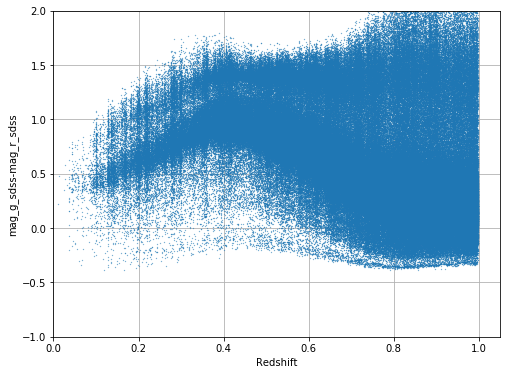

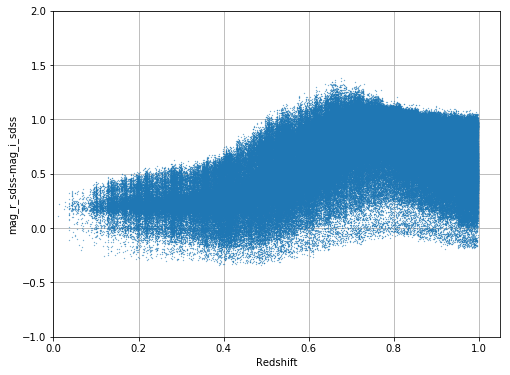

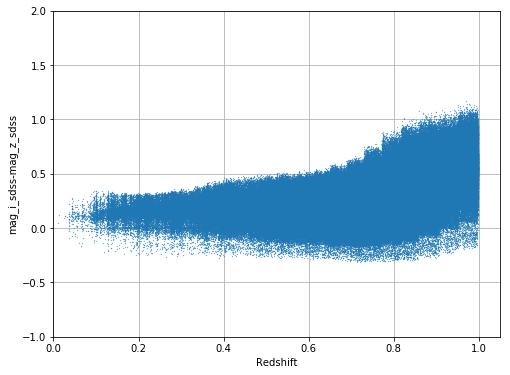

In [36]:
# idx = np.arange(len(data))
idx = np.random.choice(len(data), size=int(len(data)//20), replace=False)

for index in range(len(mag_list)-1):
    mag_col1 = mag_list[index]
    mag_col2 = mag_list[index+1]
    plt.figure(figsize=(8, 6))
    plt.plot(data['redshift_true'][idx], data[mag_col1][idx]-data[mag_col2][idx], '.', markersize=0.5, alpha=1)
    plt.xlim([0., 1.05])
    plt.ylim([-1, 2.])
    plt.ylabel(mag_col1+'-'+mag_col2)
    plt.xlabel('Redshift')
    plt.grid()

In [34]:
# idx = np.arange(len(data))
# # idx = np.random.choice(len(data), size=int(len(data)//20), replace=False)

# for index in range(len(mag_list)-1):
#     mag_col1 = mag_list[index]
#     mag_col2 = mag_list[index+1]
#     plt.figure(figsize=(8, 6))
#     plt.plot(data['redshift_true'][idx], data[mag_col1][idx]-data[mag_col2][idx], '.', markersize=0.5, alpha=1)
#     plt.xlim([0., 0.25])
#     plt.ylim([-1, 2.])
#     plt.ylabel(mag_col1+'-'+mag_col2)
#     plt.xlabel('Redshift')
#     plt.grid()